<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [14]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [15]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [16]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [17]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [18]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [19]:
boston_df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

In [20]:
boston_df.drop(['Unnamed: 0'], axis=1, inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [21]:
indexes=['Count']
tab_df=pd.DataFrame(boston_df.count(), columns=indexes)
tab_df

,Count
CRIM,506
ZN,506
INDUS,506
CHAS,506
NOX,506
RM,506
AGE,506
DIS,506
RAD,506
TAX,506


In [22]:

table=[]
for column_name in boston_df.columns:
    column = boston_df[column_name]
    count1 = (column == 0).sum()
    count2 = (column == 'NaN').sum()
   # tab.add_row([column_name, count1, count2])
    table.append([column_name, count1, count2])

indexes=['Column Name', 'Count of zeros', 'Count of NaN']
tab_df=pd.DataFrame(table, columns=indexes)
tab_df.reset_index(drop=True, inplace=True)
df_reset=tab_df.set_index('Column Name')
df_reset

,Count of zeros,Count of NaN
Column Name,,
CRIM,0,0
ZN,372,0
INDUS,0,0
CHAS,471,0
NOX,0,0
RM,0,0
AGE,0,0
DIS,0,0
RAD,0,0


In [23]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


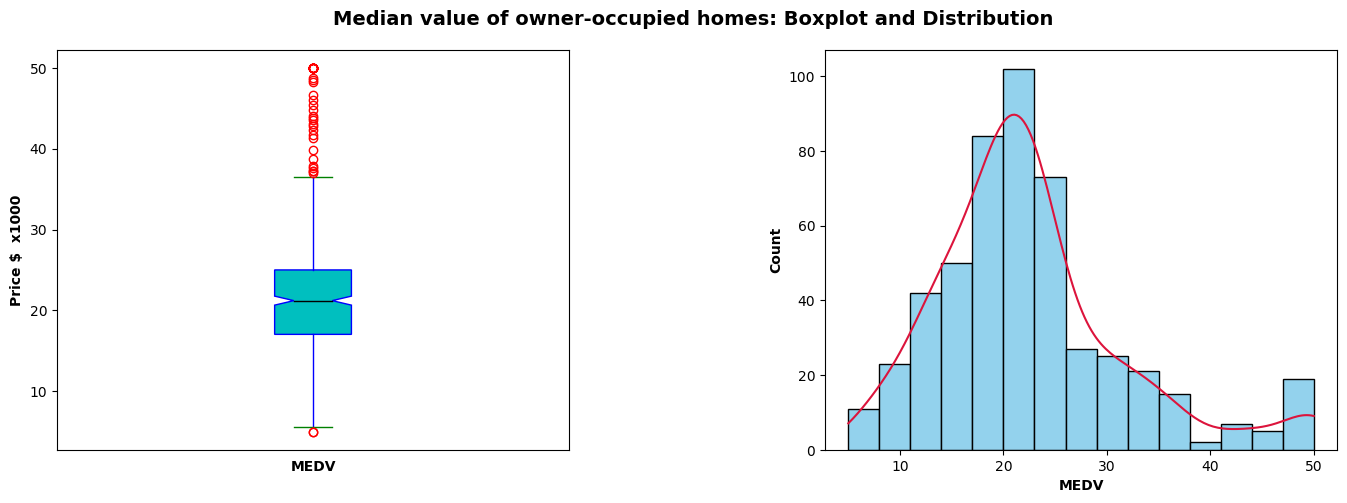

In [24]:
# Median value of owner-occupied homes
fig,ax=plt.subplots(1,2,figsize=(16,5))
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.5,
                    hspace=0.4)

fig.suptitle('Median value of owner-occupied homes: Boxplot and Distribution ', fontsize=14, fontweight='bold')

ax[0].boxplot(boston_df['MEDV'], notch=True, patch_artist=True,
            boxprops=dict(facecolor='c', color='b'),
            capprops=dict(color='g'),
            whiskerprops=dict(color='b'),
            flierprops=dict(color='m', markeredgecolor='r'),
            medianprops=dict(color='k'),
            )
ax[0].set_xticks([])
ax[0].set_ylabel('Price $  x1000', weight='bold')
ax[0].set_xlabel('MEDV', weight='bold')


ax[1]=sns.histplot(data=boston_df,x='MEDV', bins=15, color="skyblue", alpha = 0.9, kde=True)  #, line_kws={'color': 'k'})
ax[1].lines[0].set_color('crimson')   # change color of kde... 
ax[1].set_ylabel('Count', weight='bold')
ax[1].set_xlabel('MEDV', weight='bold')
print('  ')

Old data: 1970s, maximum median price is around $50000.
The median is 21200 $ as stated in section III.2, last column.
Above 75% quartile, we find many outliers. Hence a distribution that looks like a normal distribution skewed to the right. This will be accunted for, during the statistical analysis for selecting the best tests.

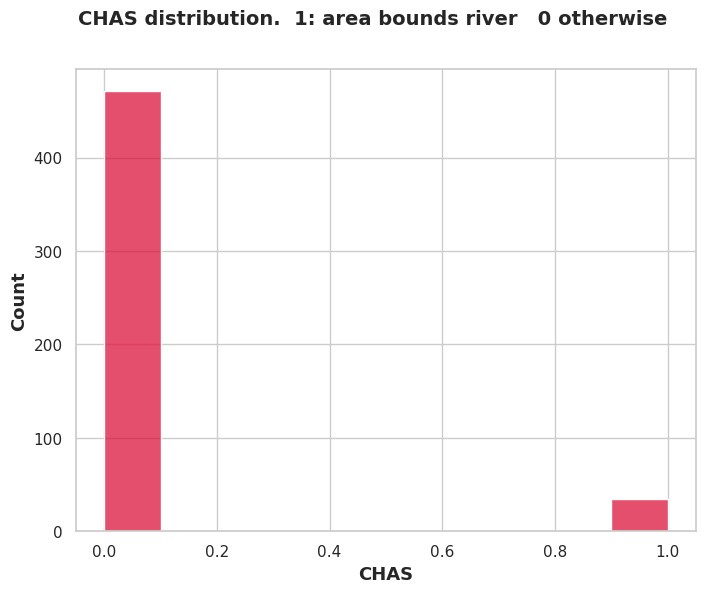

In [26]:
# Charles river variable
fig = plt.figure(figsize = (8, 6))
sns.set(style="whitegrid")
#ax = sns.barplot(x="CHAS", y='MEDV',data=boston_df)
#ax = sns.barplot(x="CHAS",data=boston_df)
#Charles River dummy variable (1 if tract bounds river; 0 otherwise)
fig.suptitle('CHAS distribution.  1: area bounds river   0 otherwise ', fontsize=14, fontweight='bold')
ax = sns.histplot(data=boston_df,x="CHAS", color="crimson")
ax.set_xlabel('CHAS', fontsize=13, fontweight='bold')
ax.set_ylabel('Count', fontsize=13, fontweight='bold')
plt.show()

In [27]:
boston_df['CHAS'].value_counts()
#indexes=['Count']
#$tab_df=pd.DataFrame(boston_df['CHAS'].value_counts(), columns=indexes)
tab_df=pd.DataFrame(boston_df['CHAS'].value_counts())
tab_df

,count
CHAS,
0.0,471
1.0,35


In [28]:
# MEDV variable vs the AGE variable.
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_group'] = 0
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_group'] = 1
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_group'] = 2

In [29]:
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,1.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,2.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,1.0


<ipython-input-30-c838ccd42e0f>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['[0 , 35]', ']35 , 70[','[70 , max]'],  fontweight='bold')


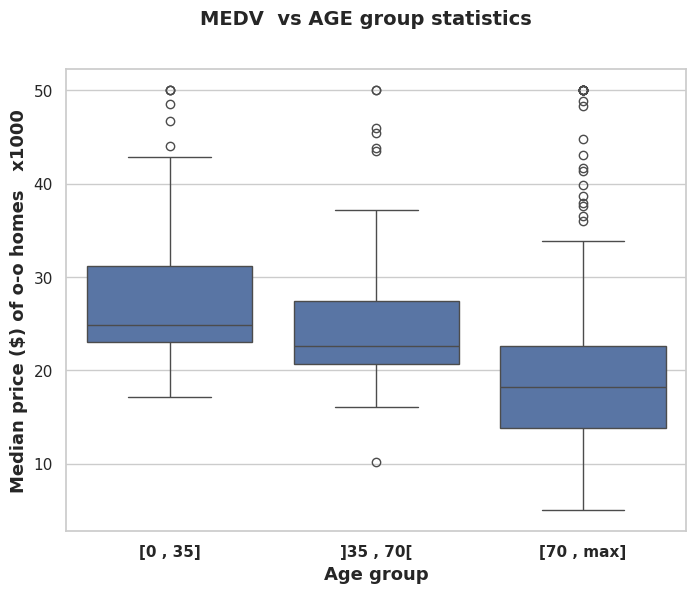

In [30]:
fig = plt.figure(figsize = (8, 6))
fig.suptitle('MEDV  vs AGE group statistics',fontsize=14, fontweight='bold')
sns.set(style="whitegrid")
ax = sns.boxplot(x='AGE_group', y='MEDV', data=boston_df.sort_values('AGE_group'))
ax.set_xticklabels(['[0 , 35]', ']35 , 70[','[70 , max]'],  fontweight='bold')
ax.set_xlabel('Age group', fontsize=13, fontweight='bold')
ax.set_ylabel('Median price ($) of o-o homes   x1000', fontsize=13, fontweight='bold')
plt.show()

The median of city areas home median prices decreases with an increasing proportion of old houses. Which seems normal.
Nevertheless, we can see many outliers in the last category: city areas with high percentage of old houses. This could be linked to other factors, such as large old homes with view on the Charles river for example. We will investigate this aspect in the Statistical Analysis section.

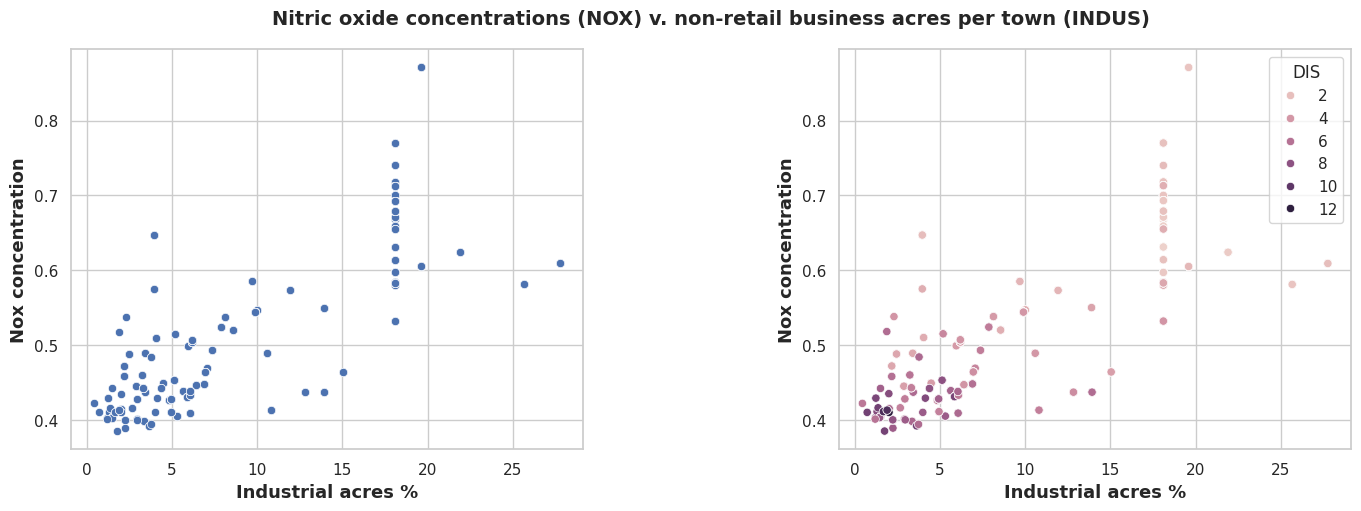

In [31]:
# Nitric oxide concentrations v. non-retail business acres per town.
fig=plt.figure(figsize=(16,5))
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.5,
                    hspace=0.4)
fig.suptitle('Nitric oxide concentrations (NOX) v. non-retail business acres per town (INDUS)',fontsize=14, fontweight='bold')
ax = fig.add_subplot(1, 2, 1)
#sns.set(style="whitegrid")
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set_xlabel('Industrial acres %',fontsize=13, fontweight='bold')
ax.set_ylabel('Nox concentration', fontsize=13, fontweight='bold')
ax = fig.add_subplot(1, 2, 2)
ax = sns.scatterplot(x='INDUS', y='NOX', hue='DIS', data=boston_df)
ax.set_xlabel('Industrial acres %',fontsize=13, fontweight='bold')
ax.set_ylabel('Nox concentration', fontsize=13, fontweight='bold')
plt.show()

We can see a linear dependance NOX vs. INDUS. Nox pollution is linked to an increasing proportion of industrial zones in a given city area.

From the second graph, it looks like DIS has a more significant impact on NOX than variable INDUS. We will analyse the correlation NOX-DIS in Appendix.
More than industrial activities, vehicle traffic could be the driving factor in NOX concentration. In the 60s, 70s, catalytic converters did not exist. It is possible that the five Boston employment centres were located downtown, where traffic was dense and exhaust gas pollution more concentrated. The distance to radial highways does not seem to have a strong effect on NOX concentration, possibly because at the time, traffic was more fluid on the highways.

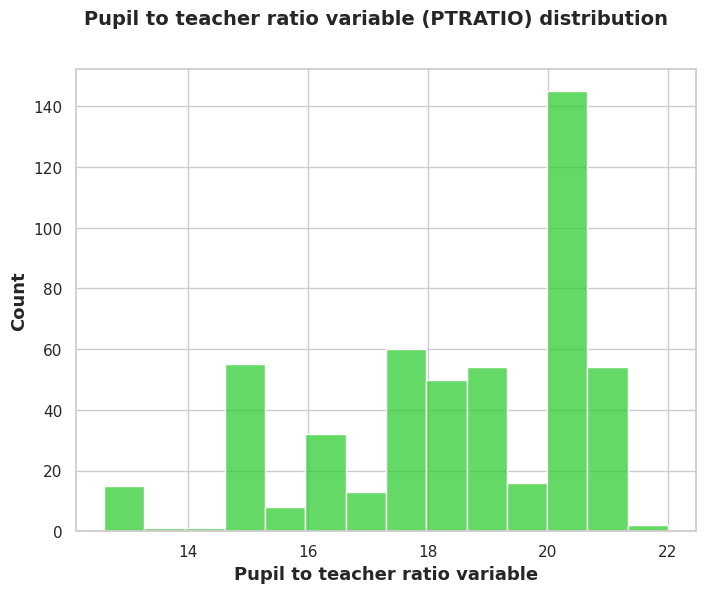

In [32]:
# Pupil to teacher ratio variable
fig = plt.figure(figsize = (8, 6))
sns.set(style="whitegrid")

fig.suptitle('Pupil to teacher ratio variable (PTRATIO) distribution', fontsize=14, fontweight='bold')
ax = sns.histplot(data=boston_df,x='PTRATIO', color="limegreen")
ax.set_xlabel('Pupil to teacher ratio variable', fontsize=13, fontweight='bold')
ax.set_ylabel('Count', fontsize=13, fontweight='bold')
plt.show()

In [33]:
boston_df['PTRATIO'].describe()
tab_df=pd.DataFrame(boston_df['PTRATIO'].describe())
tab_df

,PTRATIO
count,506.000000
mean,18.455534
std,2.164946
min,12.600000
25%,17.400000
50%,19.050000
75%,20.200000
max,22.000000


The distribution is skewed to the left. It is possible that low ratio is linked to private schools in wealthy areas. From section III.3, we know that PTRATIO is strongly linearly correlated with MEDV (negatively !). Therefore a high proportion of expensive house MEDV is linked to low PTRATIO.
It could be interesting to study the link between low MEDV, high PTRATIO, high CRIM, high percentage LSTAT (lower status of the population).

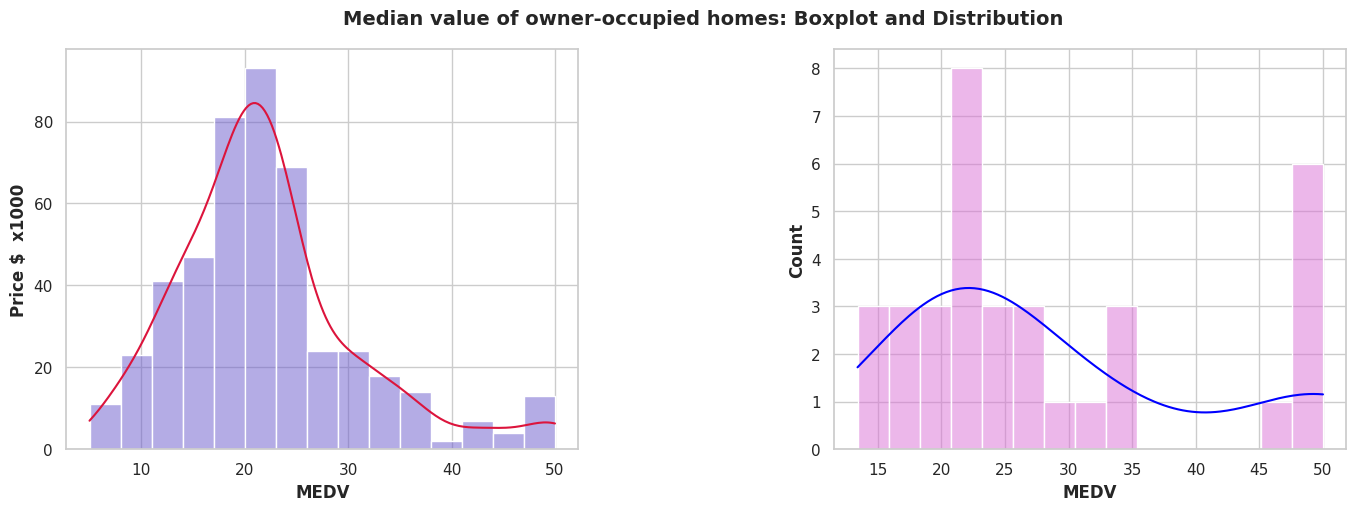

In [34]:
# Statistical Analysis
#  - Median value of houses bounded by the Charles river
fig=plt.figure(figsize=(16,5))
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.5,
                    hspace=0.4)

fig.suptitle('Median value of owner-occupied homes: Boxplot and Distribution ', fontsize=14, fontweight='bold')

ax = fig.add_subplot(1, 2, 1)
ax=sns.histplot(x=boston_df[boston_df['CHAS'] == 0]['MEDV'],
    #x=boston_df['MEDV'],
                  bins=15,
                  kde=True,
                  color='slateblue')
ax.lines[0].set_color('crimson')   # change color of kde... 
ax.set_ylabel('Price $  x1000', weight='bold')
ax.set_xlabel('MEDV', weight='bold')

ax = fig.add_subplot(1, 2, 2)
ax=sns.histplot(x=boston_df[boston_df['CHAS'] == 1]['MEDV'],
    #x=boston_df['MEDV'],
                  bins=15,
                  kde=True,
                  color='orchid')
ax.lines[0].set_color('blue')   # change color of kde... 
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('MEDV', weight='bold')
plt.show()

MEDV data for CHAS=0 follows a some kind of normal distriubution skewed to the right.
MEDV data for CHAS=1 does not follow a normal distriobution.
We compute quick statistics on both datasets:

In [36]:
# For displaying datafrme side by side... 
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [37]:
df1=boston_df[boston_df['CHAS'] == 1]['MEDV'].describe().to_frame()
df2=boston_df[boston_df['CHAS'] == 0]['MEDV'].describe().to_frame()
#----
df1=df1.rename(columns={'MEDV': 'MEDV for CHAS=1'})
df2=df2.rename(columns={'MEDV': 'MEDV for CHAS=0'})
#--------
display_side_by_side(df1,df2)

,MEDV for CHAS=1
count,35.000000
mean,28.440000
std,11.816643
min,13.400000
25%,21.100000
50%,23.300000
75%,33.150000
max,50.000000
,MEDV for CHAS=0
count,471.000000


We expect Levene test and T-test to confirm a signficant difference in variance (std^2) and average values.

Levene Test - Variances

Before running the T-test we check the status of variances. We will use a Levene test, appropriate when data doesn't follow normal distribution.
Significance level: alpha=0.05
null hypothesis: H0: sigma1 Square = sigma2 square
H1: sigma1 Square not equal to sigma2 square

In [38]:
stat,p= scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')       #  Levene Test 
#stat,p= scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
#                       boston_df[boston_df['CHAS'] == 1]['MEDV'], center='median')  #  Brown-Forsythe Test   center='median'
#stat,p= scipy.stats.bartlett(boston_df[boston_df['CHAS'] == 0]['MEDV'],
#                   boston_df[boston_df['CHAS'] == 1]['MEDV'])
# since the p-value is greater than 0.05 we can assume equality of variance
print(f"Test statistic {stat:5.3f}")  
print(f"p-value {p:5.3f}") 

Test statistic 8.752
p-value 0.003


In [39]:
# t test
stat,p= scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)
print(f"Test statistic {stat:5.3f}")  
print(f"p-value {p:5.3f}") 

Test statistic -3.113
p-value 0.004


In [40]:
# Median values of houses (MEDV) per age group
ag0=boston_df[boston_df['AGE_group'] == 0]['MEDV']
ag1=boston_df[boston_df['AGE_group'] == 1]['MEDV']
ag2=boston_df[boston_df['AGE_group'] == 2]['MEDV']


In [41]:
stat, p = scipy.stats.levene(boston_df[boston_df['AGE_group'] == 0]['MEDV'],
                               boston_df[boston_df['AGE_group'] == 1]['MEDV'], 
                               boston_df[boston_df['AGE_group'] == 2]['MEDV'], center='mean')
print(f"Test statistic {stat:5.3f}")  
print(f"p-value {p:5.3f}") 

Test statistic 2.781
p-value 0.063


The p-value is higher than 0.05, we failed to reject 
, variances of all 3 samples are close ! We can run the One Way ANOVA test.

In [42]:
f_statistic, p_value = scipy.stats.f_oneway(ag0, ag1, ag2)
#print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
print(f"Test statistic {f_statistic:5.3f}")  
print(f"p-value {p_value:2e}")

#f_statistic, p_value

Test statistic 36.408
p-value 1.710501e-15


Since the p-value is less than 0.05, we reject hypothesis 
, and the mean values of at least 2 groups, are not equal.

AGE has an impact on mean prices (MEDV). This result was visible in the boxplot in section IV.3. The test does not say much about the numerous outliers in age group=2 (higher rate of old houses). Other factors are involved: number of rooms,...

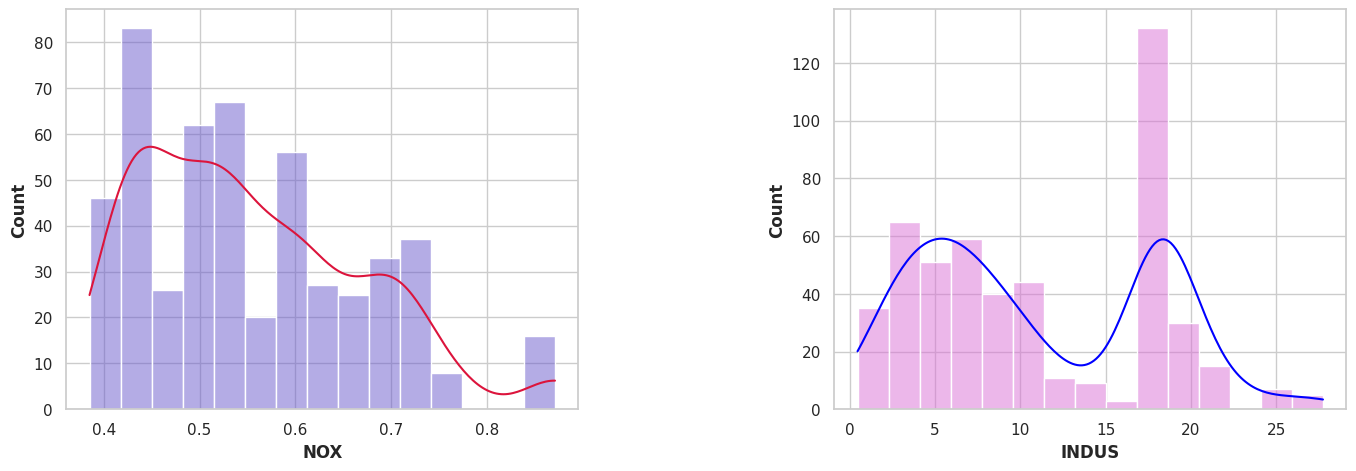

In [43]:
# Nitric oxide concentrations v. non-retail business acres per town
fig=plt.figure(figsize=(16,5))
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.5,
                    hspace=0.4)

ax = fig.add_subplot(1, 2, 1)
ax=sns.histplot(x=boston_df['NOX'],
                  bins=15,
                  kde=True,
                  color='slateblue')
ax.lines[0].set_color('crimson')   # change color of kde... 
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('NOX', weight='bold')

ax = fig.add_subplot(1, 2, 2)
ax=sns.histplot(x=boston_df['INDUS'],
                  bins=15,
                  kde=True,
                  color='orchid')
ax.lines[0].set_color('blue')   # change color of kde... 
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('INDUS', weight='bold')
plt.show()

With some imagination, both variables are roughly normally distributed with right skew. INDUS exhibits a high number of outliers, for INDUS ~17.5.
Anyway, we proceed with the Pearson correlation test and we will run and plot a linear regression.

State the hypothesis:

H0: Nitric oxide concentrations is not correlated with non-retail business acres per town.
H1: Nitric oxide concentrations is correlated with non-retail business acres per town.
  
We assume a significance level alpha=0.05

In [44]:
stat, p = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print(f"Test statistic {stat:5.3f}")  
print(f"p-value {p:2e}") 

Test statistic 0.764
p-value 7.913361e-98


In [45]:
## X is the input variables (or independent variables)
X = boston_df['INDUS']
## y is the target/dependent variable
y = boston_df['NOX']
## add an intercept (beta_0) to our model
X = sm.add_constant(X.to_numpy()) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           7.91e-98
Time:                        20:22:43   Log-Likelihood:                 594.45
No. Observations:                 506   AIC:                            -1185.
Df Residuals:                     504   BIC:                            -1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.006     64.710      0.000       0.399       0.424
x1             0.0129      0.000     26.554      0.000       0.012       0.014
==============================================================================
Omnibus:                       35.023   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.995
Skew:                           0.548   Prob(JB):                     3.78e-11
Kurtosis:                       4.038   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
import numpy as np
print(f'Correlation coefficient R, (sqrt(R2)) based on Linear Regression {np.sqrt(0.583):5.3f}') 

Correlation coefficient R, (sqrt(R2)) based on Linear Regression 0.764


<ipython-input-48-075ab625a93f>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(X, model.params[1]*X + model.params[0], 'r' )


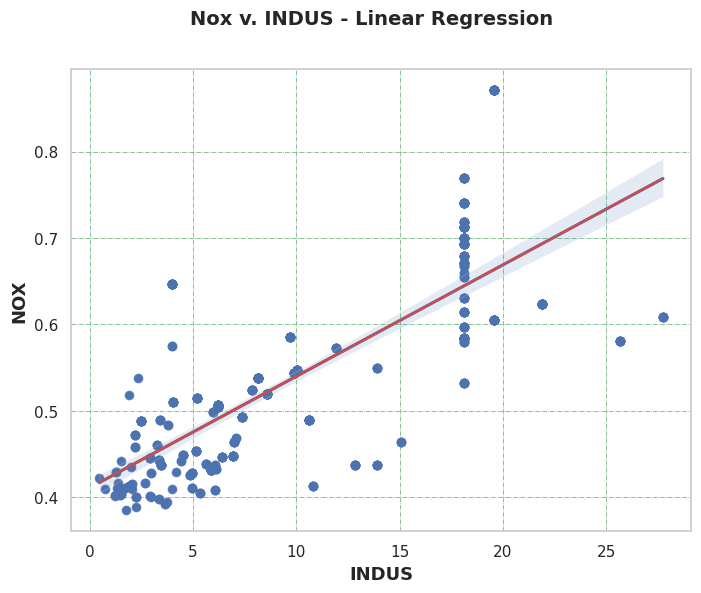

In [48]:
fig = plt.figure(figsize = (8, 6))
fig.suptitle('Nox v. INDUS - Linear Regression', fontsize=14, fontweight='bold')
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax= sns.regplot(x='INDUS', y='NOX', data=boston_df)
ax.plot(X, model.params[1]*X + model.params[0], 'r' )
ax.grid(color='g', linestyle='-.', linewidth=0.5)
ax.set_ylabel('NOX',  fontsize=13, fontweight='bold')
ax.set_xlabel('INDUS', fontsize=13, fontweight='bold')
plt.show()

Conclusion: NOX is strongly correlated with INDUS. R=0.765. Since R>0, Nox increases with INDUS variable, i.,e. with increasing industrial land acres per town.

In [49]:
# Impact of Weighted Distance to Boston employment centres (DIS) on MEDV

#------------------------
# LINEAR REGRESSION
#------------------------
## X is the input variables (or independent variables)  
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X.to_numpy()) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        20:24:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
x1             1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
print(f'Correlation coefficient R=sqrt(R2) based on Linear Regression {np.sqrt(0.062):5.3f}')

Correlation coefficient R=sqrt(R2) based on Linear Regression 0.249


Probability of F-Statistics is close to zero, p-value << 0.05, we reject hypothesis H0

We conclude that there is an impact of DIS variable on MEDV. MEDV tends to increases, as distance to employment centers increases.
Nevertheless assuming a linear regression, the correlation factor R=0.25 is relatively low.
We visualize the regression line and a scatter plot.

<ipython-input-51-850e1eb8cc70>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(X, model.params[1]*X + model.params[0], 'r' )


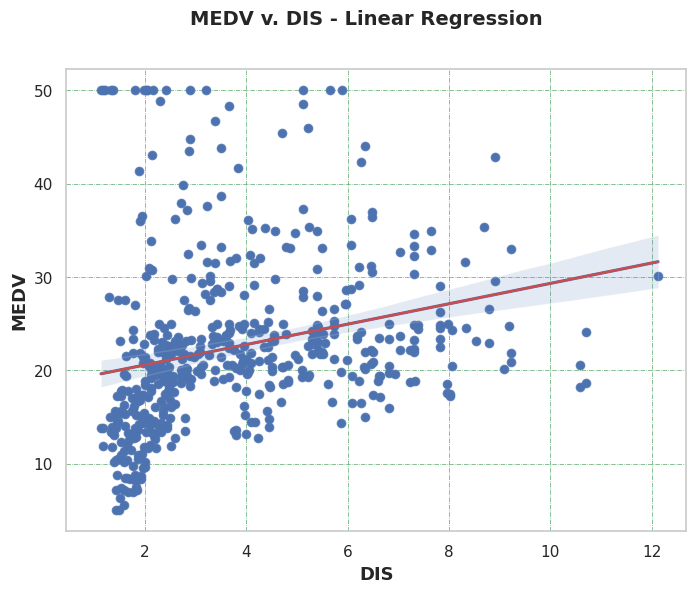

In [51]:
fig = plt.figure(figsize = (8, 6))
fig.suptitle('MEDV v. DIS - Linear Regression', fontsize=14, fontweight='bold')
ax= sns.scatterplot(x='DIS', y='MEDV', data=boston_df)
ax= sns.regplot(x='DIS', y='MEDV', data=boston_df)
plt.plot(X, model.params[1]*X + model.params[0], 'r' )
ax.grid(color='g', linestyle='-.', linewidth=0.5)
ax.set_ylabel('MEDV',  fontsize=13, fontweight='bold')
ax.set_xlabel('DIS', fontsize=13, fontweight='bold')
plt.show()

In [52]:
stat, p = scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])
print(f"Pearson Test statistic {stat:5.3f}")  
print(f"p-value {p:2e}") 
print(f'Correlation coefficient R sqrt(R2) based on Linear Regression {np.sqrt(0.062):5.3f}')

Pearson Test statistic 0.250
p-value 1.206612e-08
Correlation coefficient R sqrt(R2) based on Linear Regression 0.249


Conclusion: The PRson correlation test confirms the results opf the linear regression. Since the p-value << 0.05, we reject the Null hypothesis and conclude that there is an impact of DIS variable on MEDV.

# conclusions
There a significant difference in median value of houses bounded by the Charles river.
Age has a significant negative impact on Median values of houses (MEDV). But it is not the only factor.
There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town i.e. Industrial areas. We found that vehicle trafic density could have a significant impact assuming that employement centers were downtown. (see appendix).
There is an influence of the weighted distance to the five Boston employment centres on the median value of owner occupied homes, but it is mild. It is possible that these employment centers were located downtown, in office buildings areas.